In [2]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import split_scale
import wrangle
import env
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, QuantileTransformer, PowerTransformer, RobustScaler, MinMaxScaler
from pydataset import data
from sklearn.metrics import mean_squared_error
from math import sqrt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
customer_id        1695 non-null object
monthly_charges    1695 non-null float64
total_charges      1695 non-null object
tenure             1695 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 53.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
customer_id        1695 non-null object
monthly_charges    1695 non-null float64
total_charges      1685 non-null object
tenure             1695 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 53.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1685 entries, 0 to 1694
Data columns (total 4 columns):
customer_id        1685 non-null object
monthly_charges    1685 non-null float64
total_charges      1685 non-null float64
tenure             1685 non-null int64
dtypes: float64(2), int64(1), object(1)
memory usage: 65.8+ KB


In [4]:
# Load the tips dataset from either pydataset or seaborn.

df = sns.load_dataset('tips')
df.describe()
df.info()
df.corr()
df.size
df.shape

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
6,25.29,4.71,Male,No,Sun,Dinner,4
7,8.77,2.00,Male,No,Sun,Dinner,2
8,26.88,3.12,Male,No,Sun,Dinner,4
9,15.04,1.96,Male,No,Sun,Dinner,2
10,14.78,3.23,Male,No,Sun,Dinner,2


In [70]:
# Fit a linear regression model (ordinary least squares) 
# and compute yhat, predictions of tip using total_bill. 
# You may follow these steps to do that:

In [8]:
from statsmodels.formula.api import ols

tip = df['tip']
total_bill = df['total_bill']

ols_model = ols('tip~total_bill',data=df).fit()


df['yhat'] = ols_model.predict(total_bill)

df[['tip','yhat']]

ols_model.summary()

,total_bill,tip,sex,smoker,day,time,size,y,yhat
1,16.99,1.01,Female,No,Sun,Dinner,2,1.01,2.704636
2,10.34,1.66,Male,No,Sun,Dinner,3,1.66,2.006223
3,21.01,3.50,Male,No,Sun,Dinner,3,3.50,3.126835
4,23.68,3.31,Male,No,Sun,Dinner,2,3.31,3.407250
5,24.59,3.61,Female,No,Sun,Dinner,4,3.61,3.502822


In [14]:
# Write a function, plot_residuals(x, y, dataframe) that takes the feature, 
# the target, 
# and the dataframe as input and returns a residual plot. (hint: seaborn has an easy way to do this!)


def plot_residuals(x, y, df):
    return sns.residplot(x, y, df)

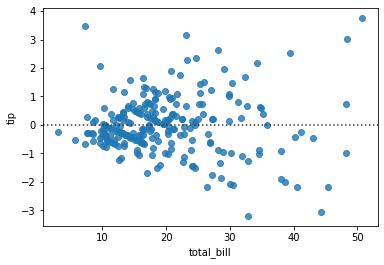

In [63]:
plot_residuals(tips.total_bill, tips.tip, tips)

In [15]:
# Write a function, regression_errors(y, yhat), that takes in y and yhat, 
# returns the sum of squared errors (SSE), 
# explained sum of squares (ESS), 
# total sum of squares (TSS), 
# mean squared error (MSE) and root mean squared error (RMSE).

# df['residual'] = df['yhat'] - df.y
# df['residual-2'] = df['residual'] ** 2


def regression_errors(y, yhat):
    sse = mean_squared_error(y, yhat)*len(y)
    ess = sum((yhat - y.mean())**2)
    tss = sse + ess
    mse = mean_squared_error(y, yhat)
    rmse = sqrt(mean_squared_error(y, yhat))
    df_eval = pd.DataFrame(np.array(['SSE', 'ESS','TSS','MSE','RMSE']), columns = ['metric'])
    df_eval['model_error'] = np.array([sse, ess, tss, mse, rmse])
    return df_eval

df_eval = regression_errors(df.tip,df.yhat)


In [20]:
# Write a function, baseline_mean_errors(y), 
# that takes in your target, y, computes the SSE, MSE & RMSE 
# when yhat is equal to the mean of all y, 
# and returns the error values (SSE, MSE, and RMSE).

def baseline_mean_errors(y):
    df_baseline = pd.DataFrame(y)
    df_baseline['y.mean()'] = y.mean()
    df_baseline['residual'] = df_baseline['y.mean()'] - y
    df_baseline['residual^2'] = df_baseline['residual'] **2
    sse = sum(df_baseline['residual^2'])
    mse = sse/len(y)
    rmse = sqrt(mse)
    df_baseline_error = pd.DataFrame({'metric': ['SSE', 'MSE', 'RMSE'], 'baseline_error': [sse, mse, rmse]})
    return df_baseline_error


In [21]:
# Write a function, better_than_baseline(SSE), 
# that returns true if your model performs better than the baseline, otherwise false.


# (df_eval[df_eval.metric == 'SSE']).model_error.sum()
# (df_baseline_error[df_baseline_error.metric == 'SSE']).baseline_error.sum()

def yhat_predict(x,y,df):
    y = pd.DataFrame(y)
    x = pd.DataFrame(x)
    ols_model = ols('y~x',data=df).fit()
    df['yhat'] = ols_model.predict(x)
    return df['yhat']

def better_than_baseline(x,y,df):
    yhat = yhat_predict(x,y,df)
    df_eval = regression_errors(y,yhat)
    df_baseline_error = baseline_mean_errors(y)
    sse_model = (df_eval[df_eval.metric == 'SSE']).model_error.sum()
    sse_baseline = (df_baseline_error[df_baseline_error.metric == 'SSE']).baseline_error.sum()
    return sse_model < sse_baseline



In [19]:
# Write a function, model_significance(ols_model), 
# that takes the ols model as input and 
# returns the amount of variance explained in your model, 
# and the value telling you whether the correlation between 
# the model and the tip value are statistically significant.

tip = df['tip']
total_bill = df['total_bill']

ols_model = ols('tip~total_bill',data=df).fit()

def model_significance(ols_model):
    evs = ols_model.rsquared
    f_pval = ols_model.f_pvalue
    return f'evs: {evs:.4f}, f_pval: {f_pval}'

model_significance(ols_model)

'evs: 0.4566, f_pval: 6.692470646863376e-34'